In [47]:
import numpy as np
from matplotlib import pyplot as plt
import json
import psi4

In [56]:
mol_str = """
Li
H 1 1.8
symmetry c1
"""

options_dict = {
    "basis": "6-311g",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
    'num_roots' : 5
}

mol = psi4.geometry(mol_str)
psi4.set_options(options_dict)
scf_e, wfn = psi4.energy('SCF', return_wfn=True)
fci_energy, wfn = psi4.energy('fci',ref_wfn=wfn, return_wfn=True)



Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMK4CY657ALT
*** at Fri Sep  1 11:21:40 2023

   => Loading Basis Set <=

    Name: 6-311G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    41 file /Users/jfoley19/Code/psi4/objdir-Release/stage/share/psi4/basis/6-311g.gbs 
    atoms 2 entry H          line    21 file /Users/jfoley19/Code/psi4/objdir-Release/stage/share/psi4/basis/6-311g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    500 MiB Core
         -----------------------------------------

    EX ALLOW       =  1  1  1  1 
    STATE AVERAGE  =  0(1.00) 

   ==> CI Orbital and Space information <==

   ------------------------------------
               Space    Total     A
   ------------------------------------
                 Nso       16    16
                 Nmo       16    16
               Ndocc        2     2
               Nsocc        0     0
   ------------------------------------
              CI Spaces
   ------------------------------------
        Dropped DOCC        0     0
              Active       16    16
        Dropped UOCC        0     0
   ------------------------------------

   ==> Setting up CI strings <==

    There are 120 alpha and 120 beta strings
    The CI space requires 14400 (1.44E+04) determinants and 1 blocks

   ==> Transforming CI integrals <==

	Presorting SO-basis two-electron integrals.
	Sorting File: SO Ints (nn|nn) nbuckets = 1
	Constructing frozen core operators
	Starting first half-transformation.
	Sorting half-transformed i

In [62]:
mol_tmpl = """
Li
H 1 **R**
symmetry c1
"""

r_data = np.linspace(1.4, 2.2, 50)

fci_e0 = []
fci_e1 = []
fci_e2 = []
for r in r_data:
    mol_str = mol_tmpl.replace("**R**", str(r))
    mol = psi4.geometry(mol_str)
    scf_e, wfn = psi4.energy('SCF', return_wfn=True)
    fci_energy, wfn = psi4.energy('fci',ref_wfn=wfn, return_wfn=True)
    fci_e0.append(wfn.variable("CI ROOT 0 TOTAL ENERGY"))
    fci_e1.append(wfn.variable("CI ROOT 1 TOTAL ENERGY"))
    fci_e2.append(wfn.variable("CI ROOT 2 TOTAL ENERGY"))
    
    


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEMK4CY657ALT
*** at Fri Sep  1 11:26:45 2023

   => Loading Basis Set <=

    Name: 6-311G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry LI         line    41 file /Users/jfoley19/Code/psi4/objdir-Release/stage/share/psi4/basis/6-311g.gbs 
    atoms 2 entry H          line    21 file /Users/jfoley19/Code/psi4/objdir-Release/stage/share/psi4/basis/6-311g.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    500 MiB Core
         -----------------------------------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        4      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        5      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSON      UPDATE        = DAVIDSON
    S              =   0.0000      Ms0           =      YES
    GUESS VECTOR   =  H0BLOCK      OPENTYPE      =     NONE
    COLLAPSE SIZE  =        1      HD AVG        = EVANGELISTI
    MAX NUM VECS   =      125      REF SYM       =     AUTO
    I

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        4      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        5      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSON      UPDATE        = DAVIDSON
    S              =   0.0000      Ms0           =      YES
    GUESS VECTOR   =  H0BLOCK      OPENTYPE      =     NONE
    COLLAPSE SIZE  =        1      HD AVG        = EVANGELISTI
    MAX NUM VECS   =      125      REF SYM       =     AUTO
    I

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

         ---------------------------------------------------------


   ==> Parameters <==

    EX LEVEL       =        4      H0 BLOCKSIZE  =     1000
    VAL EX LEVEL   =        0      H0 GUESS SIZE =     1000
    H0COUPLINGSIZE =        0      H0 COUPLING   =       NO
    MAXITER        =       24      NUM PRINT     =       20
    NUM ROOTS      =        5      ICORE         =        1
    PRINT LVL      =        1      FCI           =      YES
    R CONV         = 1.00e-04      MIXED         =      YES
    E CONV         = 1.00e-10      MIXED4        =      YES
    R4S            =       NO      REPL OTF      =       NO
    DIAG METHOD    =      SEM      FOLLOW ROOT   =        0
    PRECONDITIONER = DAVIDSON      UPDATE        = DAVIDSON
    S              =   0.0000      Ms0           =      YES
    GUESS VECTOR   =  H0BLOCK      OPENTYPE      =     NONE
    COLLAPSE SIZE  =        1      HD AVG        = EVANGELISTI
    MAX NUM VECS   =      125      REF SYM       =     AUTO
    I

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

    Two-Electron Energy =                   3.2401513418885060
    Total Energy =                         -7.9727641311300967

Computation Completed


Properties will be evaluated at   0.000000,   0.000000,   0.000000 [a0]

Properties computed using the SCF density matrix


 Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :          0.0000000            0.0000000            0.0000000
 Dipole Y            :         -0.0000000            0.0000000           -0.0000000
 Dipole Z            :         -4.6311550            1.8690810           -2.7620740
 Magnitude           :                                                    2.7620740

 ---------------------------------------------

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                              Matt L. Leininger
         ------------------

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

 MINTS: Wrapper to libmints.
   by Justin Turney

   Calculation information:
      Number of threads:                 1
      Number of atoms:                   2
      Number of AO shells:              10
      Number of SO shells:              10
      Number of primitives:             21
      Number of atomic orbitals:        16
      Number of basis functions:        16

      Number of irreps:                  1
      Integral cutoff                 1.00e-12
      Number of functions per irrep: [  16 ]

 OEINTS: Overlap, kinetic, potential, dipole, and quadrupole integrals
         stored in file 35.

      Computing two-electron integrals...done
      Computed 2701 non-zero two-electron integrals.
        Stored in file 33.


         ---------------------------------------------------------
                          Configuration Interaction
                            (a 'D E T C I' module)

                 C. David Sherrill, Daniel G. A. Smith, and
                         

In [60]:
wfn.variable("CI ROOT 0 TOTAL ENERGY")

-8.017124148530518

In [63]:
# json file name
dirname = "/Users/jfoley19/Code/data_repository/Mapol/LiH/qed_fci/bond_stretch_50_points/6311g/number_basis/"
fn_np1 = "LiH_6311g_fci_number_basis_np_1_pes.json"
fn_np2 = "LiH_6311g_fci_number_basis_np_2_pes.json"
fn_np3 = "LiH_6311g_fci_number_basis_np_3_pes.json"
fn_np4 = "LiH_6311g_fci_number_basis_np_4_pes.json"
fn_np5 = "LiH_6311g_fci_number_basis_np_5_pes.json"
fn_np6 = "LiH_6311g_fci_number_basis_np_6_pes.json"
fn_np7 = "LiH_6311g_fci_number_basis_np_7_pes.json"
fn_np8 = "LiH_6311g_fci_number_basis_np_8_pes.json"
fn_np9 = "LiH_6311g_fci_number_basis_np_9_pes.json"
fn_np10 = "LiH_6311g_fci_number_basis_np_10_pes.json"

In [64]:
# load json file into a dictionary called data
f1 = open(dirname + fn_np1)
f2 = open(dirname + fn_np2)
f3 = open(dirname + fn_np3)
f4 = open(dirname + fn_np4)
f5 = open(dirname + fn_np5)
f6 = open(dirname + fn_np6)
f7 = open(dirname + fn_np7)
f8 = open(dirname + fn_np8)
f9 = open(dirname + fn_np9)
f10 = open(dirname + fn_np10)


data1 = json.load(f1)
data2 = json.load(f2)
data3 = json.load(f3)
data4 = json.load(f4)
data5 = json.load(f5)
data6 = json.load(f6)
data7 = json.load(f7)
data8 = json.load(f8)
data9 = json.load(f9)
data10 = json.load(f10)



In [67]:
E_data1 = np.array(data1["return_result"])
E_data2 = np.array(data2["return_result"])
E_data3 = np.array(data3["return_result"])
E_data4 = np.array(data4["return_result"])
E_data5 = np.array(data5["return_result"])
E_data6 = np.array(data6["return_result"])
E_data7 = np.array(data7["return_result"])
E_data8 = np.array(data8["return_result"])
E_data9 = np.array(data9["return_result"])
E_data10 = np.array(data10["return_result"])

r_data = np.linspace(1.4, 2.2, 50)
omega = 0.12086
print(omega)

0.12086


In [37]:
# get the minimum value of the ground-state energy along the CO stretch coordinate
E_min = np.min(E_data[:,0])

print(np.allclose(E_data1[:,2],E_data10[:,2] ))
print(np.allclose(E_data2[:,2],E_data10[:,2] ))
print(np.allclose(E_data3[:,2],E_data10[:,2] ))

False
False
True


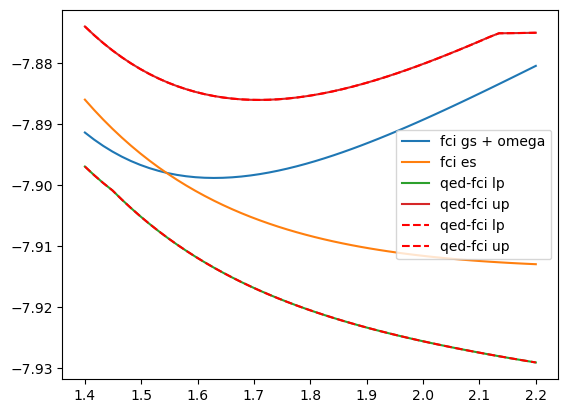

In [89]:
#plt.plot(r_data, E_data1[:,0], label="Eg Np1")
#plt.plot(r_data, fci_e0, label='fci gs')
plt.plot(r_data, np.array(fci_e0)+omega, label='fci gs + omega')
plt.plot(r_data, fci_e1, label='fci es')
#plt.plot(r_data, E_data2[:,0], label='qed-fci gs')
plt.plot(r_data, E_data4[:,1], label='qed-fci lp')
plt.plot(r_data, E_data4[:,3], label='qed-fci up')
plt.plot(r_data, E_data5[:,1], 'r--', label='qed-fci lp')
plt.plot(r_data, E_data5[:,3], 'r--', label='qed-fci up')


plt.legend()
plt.show()

In [ ]:
# plot some excited-state surfaces
#plt.plot(r_data, E_data[:,0], label="E1")
#plt.plot(r_data, E_data[:,1], label="E2")
#plt.plot(r_data, E_data[:,2], label="E3")
plt.plot(r_data, (E_data[:,3]-E_min)*27.211, label="E4")
plt.plot(r_data, (E_data[:,4]-E_min)*27.211, label="E5")
plt.plot(r_data, (E_data[:,5]-E_min)*27.211, label="E6")
plt.plot(r_data, (E_data[:,6]-E_min)*27.211, label="E7")
plt.plot(r_data, (E_data[:,7]-E_min)*27.211, label="E8")
plt.plot(r_data, (E_data[:,8]-E_min)*27.211, label="E9")
plt.plot(r_data, (E_data[:,9]-E_min)*27.211, label="E10")
plt.plot(r_data, (E_data[:,10]-E_min)*27.211, label="E11")
plt.plot(r_data, (E_data[:,11]-E_min)*27.211, label="E12")
plt.ylabel("Energy relative to $E_{min}$ (eV)")
plt.xlabel("CO Bondlength (Angstroms)")
plt.legend()
plt.show()

In [ ]:
# plot the absolute value of the z-component of mu_1j 
# this gives us some hint about how to continue surfaces
plt.plot(r_data, np.abs(Mu_data[:,0,1,2]), label="mu12")
plt.plot(r_data, np.abs(Mu_data[:,0,2,2]), label="mu13")
plt.plot(r_data, np.abs(Mu_data[:,0,3,2]), label="mu14")
plt.plot(r_data, np.abs(Mu_data[:,0,4,2]), label="mu15")
plt.plot(r_data, np.abs(Mu_data[:,0,5,2]), label="mu16")
plt.plot(r_data, np.abs(Mu_data[:,0,6,2]), label="mu17")
plt.legend()
plt.show()